In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ushape.csv')

In [3]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [4]:
df['X'] = df['3.159499363321345566e-02']
df['Y'] = df['9.869877579082642072e-01']
df['Class'] = df['0.000000000000000000e+00']

In [5]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00,X,Y,Class
0,2.115098,-0.046244,1.0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0,2.112857,0.662084,1.0


In [6]:
df.drop(columns=['3.159499363321345566e-02','9.869877579082642072e-01','0.000000000000000000e+00'],inplace=True)

In [7]:
df.head()

,X,Y,Class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [8]:
new_row = pd.DataFrame({'X':[0.031594],'Y':[0.986987],'Class':[0.0]})

In [9]:
df = pd.concat([df,new_row], ignore_index=True)

In [10]:
df.shape

(100, 3)

In [11]:
df.head()

,X,Y,Class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


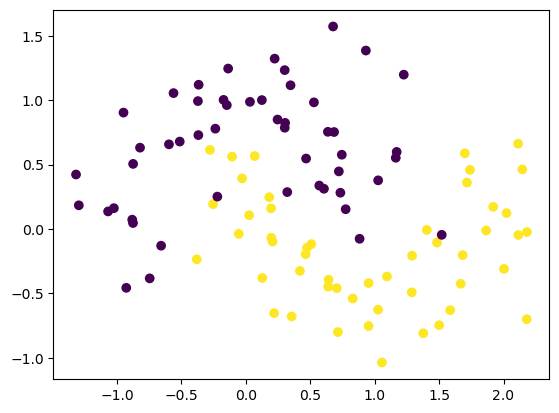

In [12]:
plt.scatter(df['X'],df['Y'],c=df['Class'])
plt.show()

In [13]:
x = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [15]:
model = Sequential()

model.add(Dense(10, activation='tanh',input_dim=2))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.get_weights()

[array([[-0.6412092 ,  0.09506071,  0.0391885 , -0.35043198, -0.41213718,
          0.23235357,  0.07709503,  0.2017703 ,  0.07035774, -0.1547656 ],
        [ 0.5208078 ,  0.2897284 ,  0.22673506,  0.67861646, -0.33891192,
         -0.696551  ,  0.4074592 ,  0.10850674, -0.5216905 , -0.08884794]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.42285624, -0.45228773,  0.42750603, -0.33664867,  0.51409876,
          0.20421767,  0.3782406 ,  0.21528965, -0.05912089,  0.4942515 ],
        [ 0.42577368,  0.1076715 ,  0.38067108, -0.46515045,  0.28168166,
         -0.37645662,  0.41616505, -0.42310187,  0.5019052 , -0.38978437],
        [-0.1822952 ,  0.4380601 , -0.3244692 , -0.3191368 ,  0.13116467,
         -0.1879524 , -0.44398004, -0.4915673 , -0.2627965 , -0.3949064 ],
        [ 0.3985135 ,  0.34301913, -0.056196  ,  0.26146215, -0.3853308 ,
         -0.04066771, -0.40733895,  0.02440155,  0.03779244, -0.46572226],
        [ 0.16961

In [17]:
initial_weights = model.get_weights()

In [18]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [19]:
model.set_weights(initial_weights)

In [20]:
model.get_weights()

[array([[ 0.88640755,  0.60394603,  0.46709096, -0.78765213, -0.17971537,
         -0.09792902, -0.58085257,  0.39566424, -0.61236304,  0.06396698],
        [ 0.57966244, -0.629628  , -0.5112807 , -0.35491842, -0.20339327,
          0.4334181 ,  1.226151  , -0.42378134,  0.62447864, -1.1651171 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.36025456,  0.2791454 , -0.02981129, -0.01501499, -0.21165344,
         -0.09857666,  0.05963396, -0.23818469,  0.11762001, -0.6310103 ],
        [-0.23748986,  0.02776938,  0.28389552, -0.32827827, -0.6717599 ,
          0.26954302,  0.07535449,  0.35327926,  0.0115701 ,  0.6580755 ],
        [-0.41514915,  0.29164988, -0.5628786 ,  0.67271566,  0.05723517,
          0.3859496 ,  0.03984051, -0.27693272, -0.00726961, -0.3597854 ],
        [ 0.37988597,  0.27029207,  0.1180882 , -0.09171058,  0.07701059,
         -0.27402356, -0.23727423,  0.03411945,  0.00684656,  0.02710613],
        [-0.14567

In [21]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
history = model.fit(x,y,epochs=100,validation_split=0.2,verbose=True)

Epoch 1/100
3/3 [==============================] - 1s 125ms/step - loss: 0.6395 - accuracy: 0.7875 - val_loss: 0.6052 - val_accuracy: 0.8500
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6200 - accuracy: 0.8000 - val_loss: 0.5816 - val_accuracy: 0.8500
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6000 - accuracy: 0.7875 - val_loss: 0.5595 - val_accuracy: 0.8500
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.5825 - accuracy: 0.8000 - val_loss: 0.5383 - val_accuracy: 0.8500
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 0.5647 - accuracy: 0.8125 - val_loss: 0.5185 - val_accuracy: 0.8500
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.5489 - accuracy: 0.8125 - val_loss: 0.4997 - val_accuracy: 0.8500
Epoch 7/100
3/3 [==============================] - 0s 16ms/step - loss: 0.5348 - accuracy: 0.8125 - val_loss: 0.4820 - val_accuracy: 0.8500
Epoch 8/100
3/3 [==

In [23]:
model.get_weights()

[array([[ 1.0956501 ,  0.50170517,  0.4470844 , -0.8269438 , -0.21009967,
         -0.07801919, -0.5193158 ,  0.35922265, -0.5142686 ,  0.18512096],
        [ 0.49644044, -0.7105862 , -0.56503016, -0.29797488, -0.15489404,
          0.4095912 ,  1.2875857 , -0.48952168,  0.6119843 , -1.1057702 ]],
       dtype=float32),
 array([-0.20780346, -0.03961786, -0.04064023,  0.16719446, -0.02732439,
         0.02421006,  0.05074961,  0.01646067, -0.00891617,  0.03981944],
       dtype=float32),
 array([[ 0.42670146,  0.21799272, -0.0145712 ,  0.08873815, -0.07850917,
         -0.25134486,  0.11480534, -0.35725278,  0.07006606, -0.6240098 ],
        [-0.2778943 ,  0.07455225,  0.23416111, -0.39750293, -0.7101344 ,
          0.2933998 ,  0.02828987,  0.28275818,  0.0682719 ,  0.71753484],
        [-0.46293318,  0.34298864, -0.6142321 ,  0.59966457,  0.01437795,
          0.41202137, -0.01213035, -0.34220558,  0.04973942, -0.29045707],
        [ 0.34506866,  0.2987201 ,  0.12175486, -0.15887584, 

9600/9600 [==============================] - 9s 943us/step


<Axes: >

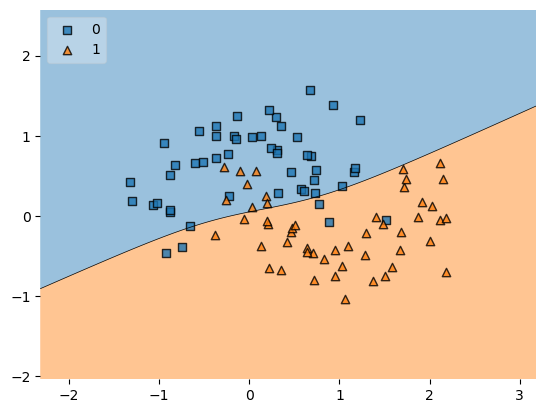

In [24]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y.astype('int'), clf=model, legend=2)